In [1]:
from textblob import TextBlob
from wordcloud import WordCloud

In [80]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

In [25]:
import seaborn as sns

In [3]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raisul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raisul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read the tweets file

In [4]:
tweets_df= pd.read_csv("english_tweets.csv")

In [5]:
tweets_df.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump as a student i used to hear for years fo...,en
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,you get a tie and you get a tie trump s rally ...,en
2,5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,her 15 minutes were over long time ago omarosa...,en
3,7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,there wont be many of them unless you all have...,en
4,8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one of the single most effective remedies to e...,en


First create a list of stopwords

In [6]:
stp_words= stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Although the tweets are already cleaned earlier by removing the @, # words, the stopwords are not removed yet. So, it is time to remove the stop words from the cleaned tweets

First create a function to remove the stop words from the cleaned tweets

In [7]:
def TweetFurtherCleaning(tweet):
    cleanTweet= ' '.join(word for word in tweet.split() if word not in stp_words)
    return cleanTweet

In [8]:
tweets_df["cleaned_tweet"]= tweets_df["cleaned_tweet"].apply(TweetFurtherCleaning)

In [9]:
tweets_df.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump student used hear years ten years heard ...,en
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,get tie get tie trump rally iowa,en
2,5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,15 minutes long time ago omarosa never represe...,en
3,7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,wont many unless voting god prevails bo corrup...,en
4,8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one single effective remedies eradicate anothe...,en


Now, find out the subjectivity and polarity of the tweets. 

Subjectivity: varies between -1 to +1 incading the negative and positive respectively.


Ploarity: Ranges between -1 to +1. If it is +1, the tweet is completely personal. As the value decreases, it is regarded as more ffactual.

Define the functions to get the polarity and subjectivity

In [10]:
#Defining for polarity
def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#Defining for subjectivity 
def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [11]:
#Now apply the functions
tweets_df["tPolarity"]= tweets_df["cleaned_tweet"].apply(calPolarity)
tweets_df["tSubjectivity"]= tweets_df["cleaned_tweet"].apply(calSubjectivity)

In [12]:
tweets_df.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump student used hear years ten years heard ...,en,0.333333,0.333333
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,get tie get tie trump rally iowa,en,0.000000,0.000000
2,5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,15 minutes long time ago omarosa never represe...,en,-0.108333,0.416667
3,7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,wont many unless voting god prevails bo corrup...,en,0.050000,0.533333
4,8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one single effective remedies eradicate anothe...,en,0.109524,0.471429


Now, do the segmentation based on polarity

In [13]:
def segmentation(tweet):
    if tweet>0:
        return "positive"
    elif tweet==0:
        return "neutral"
    else:
        return "negative"

In [14]:
#apply the function
tweets_df["segmentation"]= tweets_df["tPolarity"].apply(segmentation)

In [15]:
tweets_df.head()

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity,segmentation
0,2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,US,North America,Oregon,trump_df,trump student used hear years ten years heard ...,en,0.333333,0.333333,positive
1,4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,US,North America,District of Columbia,trump_df,get tie get tie trump rally iowa,en,0.000000,0.000000,neutral
2,5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,US,North America,California,trump_df,15 minutes long time ago omarosa never represe...,en,-0.108333,0.416667,negative
3,7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,US,North America,Ohio,trump_df,wont many unless voting god prevails bo corrup...,en,0.050000,0.533333,positive
4,8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,US,North America,Pennsylvania,trump_df,one single effective remedies eradicate anothe...,en,0.109524,0.471429,positive


Analysis and Visualization

Analysis and visualization is done for Biden and Trump separately. That's why we have to sepate the dataframe into two parts for Trump and Biden.

In [16]:
trump_tweets= tweets_df[tweets_df["candidate"]== "trump_df"]
biden_tweets= tweets_df[tweets_df["candidate"]== "biden_df"]

In [17]:
#Pivot table for Trump
trump_pivot= trump_tweets.pivot_table(index=['segmentation'], aggfunc={'segmentation': 'count'})
trump_pivot

,segmentation
segmentation,
negative,40073
neutral,65165
positive,58822


In [18]:
#Pivot table for Biden
biden_pivot= biden_tweets.pivot_table(index=['segmentation'], aggfunc={'segmentation': 'count'})
biden_pivot

,segmentation
segmentation,
negative,24459
neutral,52394
positive,53016


In [19]:
#top 3 positive tweets for Trump
trump_tweets.sort_values(by=['tPolarity'], ascending=False).head(3)

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity,segmentation
127009,654906,2020-11-05 00:21:53,.@JLCauvin hands down does the best #Trump eve...,84.0,10.0,US,North America,New York,trump_df,hands best trump ever,en,1.0,0.3,positive
79169,317959,2020-10-29 03:16:23,Another example of the fallacy that #Trump ONL...,1.0,0.0,US,North America,Ohio,trump_df,another example fallacy trump hires best amp b...,en,1.0,0.3,positive
78634,315920,2020-10-29 01:05:08,Our greatest fears and anxieties in the 1990s ...,1.0,0.0,US,North America,Texas,trump_df,greatest fears anxieties 1990s seem quaint inn...,en,1.0,1.0,positive


In [20]:
#top 3 negative tweets for Trump
trump_tweets.sort_values(by=['tPolarity']).head(3)

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity,segmentation
5824,20641,2020-10-16 01:08:37,Meanwhile whoever had “pelletized manure” in t...,98.0,21.0,US,North America,District of Columbia,trump_df,meanwhile whoever pelletized manure bidentownh...,en,-1.0,1.0,negative
2092,8363,2020-10-15 12:37:33,@GOP @realDonaldTrump GODSPEED! 🤮☠️🦠\n#SuperSp...,0.0,0.0,US,North America,Pennsylvania,trump_df,godspeed superspreaderevent superspreader maga...,en,-1.0,1.0,negative
72017,289073,2020-10-27 23:16:39,It’s despicable how #trump is mocking Gov. #gr...,3.0,1.0,US,North America,District of Columbia,trump_df,despicable trump mocking gov gretchenwhitmer h...,en,-1.0,1.0,negative


In [21]:
#top 3 positive tweets for Biden
biden_tweets.sort_values(by=['tPolarity'], ascending=False).head(3)

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity,segmentation
219653,217368,2020-10-28 14:47:25,@DonaldJTrumpJr @OUTDChannel @keithmarkmra @Te...,0.0,0.0,US,North America,Nevada,biden_df,trumps mask rocks greatest covid hits repost r...,en,1.0,1.0,positive
226126,245805,2020-10-30 14:57:54,@JeffMediaPro #Biden would be #Obama part deux...,1.0,0.0,US,North America,New York,biden_df,biden would obama part deux best,en,1.0,0.3,positive
166776,10892,2020-10-15 17:25:17,Who's hair is best?\n\n#Biden\n#Trump,0.0,0.0,US,North America,New York,biden_df,whos hair best biden trump,en,1.0,0.3,positive


In [22]:
#top 3 negative tweets for Biden
biden_tweets.sort_values(by=['tPolarity']).head(3)

,Unnamed: 0,created_at,tweet,likes,retweet_count,country,continent,state,candidate,cleaned_tweet,detected_language,tPolarity,tSubjectivity,segmentation
221994,227059,2020-10-29 03:52:06,#CoveySpreader #Nasty #COVIDIOTS #Coronavirus ...,0.0,0.0,US,North America,California,biden_df,coveyspreader nasty covidiots coronavirus maga...,en,-1.0,1.0,negative
188837,92170,2020-10-22 01:58:50,Hunter Biden’s China connections plagued by et...,1.0,3.0,US,North America,Virginia,biden_df,hunter bidens china connections plagued ethics...,en,-1.0,1.0,negative
271636,574627,2020-11-07 16:28:57,Damnnn That nigga Trump Down Terrible 😂😂😂😂 #Do...,0.0,0.0,US,North America,New York,biden_df,damnnn nigga trump terrible donaldtrump electi...,en,-1.0,1.0,negative


Visualize the wordcloud for trump

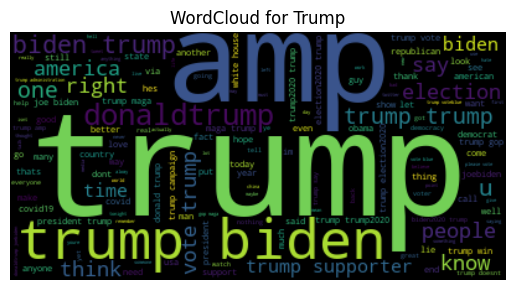

In [ ]:
consolidated= ' '. join(word for word in trump_tweets["cleaned_tweet"])

worCloud= WordCloud(width=400, height=200, random_state=20, max_font_size=120).generate(consolidated)

plt.imshow(worCloud, interpolation='bilinear')
plt.title("WordCloud for Trump")
plt.axis('off')
fig_path= "E:/ReDi_School/Data_Circle/Project/0_Github/Mir/Figure/"
#plt.savefig(os.path.join(fig_path, "4_SA_wrodcloud_Trump.png"))
plt.show()

Visualize the wordcloud for trump

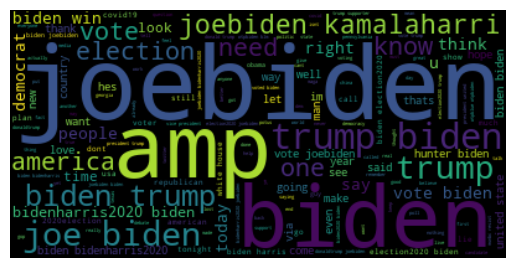

In [ ]:
consolidated= ' '. join(word for word in biden_tweets["cleaned_tweet"])

worCloud= WordCloud(width=400, height=200, random_state=20, max_font_size=120).generate(consolidated)

plt.imshow(worCloud, interpolation='bilinear')
plt.axis('off')
fig_path= "E:/ReDi_School/Data_Circle/Project/0_Github/Mir/Figure/"
#plt.savefig(os.path.join(fig_path, "5_SA_wrodcloud_Biden.png"))
plt.show()

Find the Percentage of win and lose

First for Trump

Plot the count of positive, negative and neutral count of segmentation

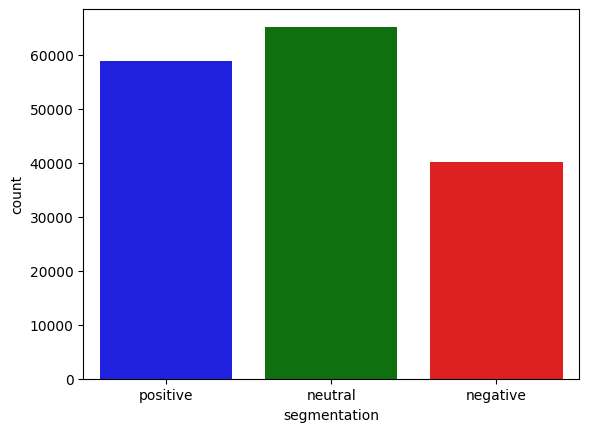

In [29]:
sns.countplot(
    data=trump_tweets,
    x="segmentation",
    hue="segmentation",  # Assign the same variable to `hue`
    palette=["blue", "green", "red"],
    dodge=False  # Prevent bar splitting due to `hue`
)
plt.legend([], [], frameon=False)  # Optionally disable the legend
plt.show()

In [33]:
positive= round(len(trump_tweets[trump_tweets["segmentation"]=="positive"]) / len(trump_tweets)*100, 1)
neutral= round(len(trump_tweets[trump_tweets["segmentation"]=="neutral"]) / len(trump_tweets)*100, 1)
negative= round(len(trump_tweets[trump_tweets["segmentation"]=="negative"]) / len(trump_tweets)*100, 1)

#create a list for these values
responses= [positive, neutral, negative]

#create a dataframe for Trump
response_trump= {'response': ['mayWin', 'mayLoose', 'notSure'], 'percentage': [positive, negative, neutral] }
response_trump= pd.DataFrame(response_trump)

In [34]:
response_trump

,response,percentage
0,mayWin,35.9
1,mayLoose,24.4
2,notSure,39.7


Now plot the percentage of win and lose for Trump

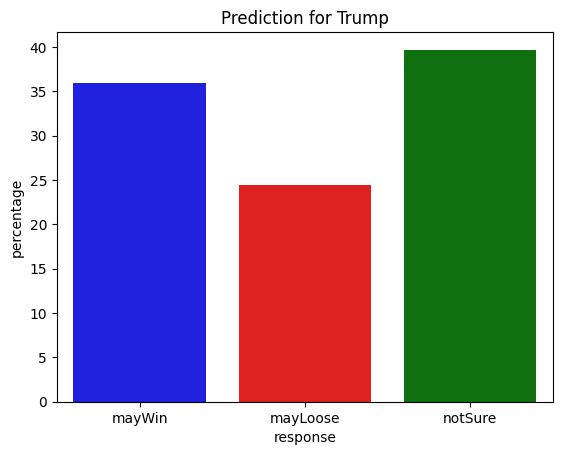

In [ ]:
sns.barplot(
    data=response_trump,
    x="response",
    y="percentage",
    hue="percentage",  # Assign the same variable to `hue`
    palette=["red", "blue", "green"],
    #palette="virdis",
    dodge=False  # Prevent bar splitting due to `hue`
)
plt.legend([], [], frameon=False)  # Optionally disable the legend
plt.title("Prediction for Trump")

fig_path= "E:/ReDi_School/Data_Circle/Project/0_Github/Mir/Figure/"
#plt.savefig(os.path.join(fig_path, "6_prediction_Trump.png"))

plt.show()

Do the same for Biden

In [45]:
positive= round(len(biden_tweets[biden_tweets["segmentation"]=="positive"]) / len(biden_tweets)*100, 1)
neutral= round(len(biden_tweets[biden_tweets["segmentation"]=="neutral"]) / len(biden_tweets)*100, 1)
negative= round(len(biden_tweets[biden_tweets["segmentation"]=="negative"]) / len(biden_tweets)*100, 1)

#create a list for these values
responses= [positive, neutral, negative]

#create a dataframe for Trump
response_biden= {'response': ['mayWin', 'mayLoose', 'notSure'], 'percentage': [positive, negative, neutral] }
response_biden= pd.DataFrame(response_biden)

In [46]:
response_biden

,response,percentage
0,mayWin,40.8
1,mayLoose,18.8
2,notSure,40.3


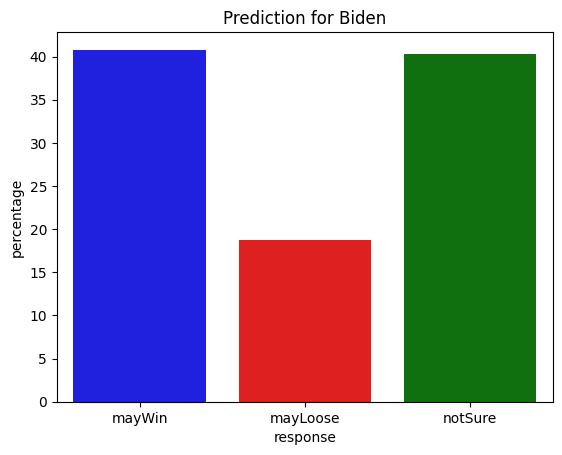

In [ ]:
sns.barplot(
    data=response_biden,
    x="response",
    y="percentage",
    hue="percentage",  # Assign the same variable to `hue`
    palette=["red", "green", "blue", ],
    dodge=False  # Prevent bar splitting due to `hue`
)
plt.legend([], [], frameon=False)  # Optionally disable the legend
plt.title("Prediction for Biden")

fig_path= "E:/ReDi_School/Data_Circle/Project/0_Github/Mir/Figure/"
#plt.savefig(os.path.join(fig_path, "7_prediction_Biden.png"))

plt.show()

Time-Series plots of sentiment analysis

In [69]:
trump_tweets["created_at"]= pd.to_datetime(trump_tweets["created_at"]) #set the column to datetime
biden_tweets["created_at"]= pd.to_datetime(biden_tweets["created_at"]) #set the column to datetime

C:\Users\Raisul\AppData\Local\Temp\ipykernel_10368\3348419129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_tweets["created_at"]= pd.to_datetime(biden_tweets["created_at"]) #set the column to datetime


In [70]:
#For trump
trump_tweets["Date"]= trump_tweets["created_at"].dt.date #sepearate the Date only as a new column
trump_tweets= trump_tweets.set_index("Date") #set this column as index

#for Biden
biden_tweets["Date"]= biden_tweets["created_at"].dt.date #sepearate the Date only as a new column
biden_tweets= biden_tweets.set_index("Date") #set this column as index

C:\Users\Raisul\AppData\Local\Temp\ipykernel_10368\2269075202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_tweets["Date"]= biden_tweets["created_at"].dt.date #sepearate the Date only as a new column


In [71]:
trump_polarity= trump_tweets.groupby(trump_tweets.index)["tPolarity"].mean()
trump_polarity= pd.DataFrame(trump_polarity)

biden_polarity= biden_tweets.groupby(biden_tweets.index)["tPolarity"].mean()
biden_polarity= pd.DataFrame(biden_polarity)

In [73]:
biden_polarity.head()

,tPolarity
Date,
2020-10-15,0.034077
2020-10-16,0.074463
2020-10-17,0.057921
2020-10-18,0.050510
2020-10-19,0.047452


Now plot as a time_series

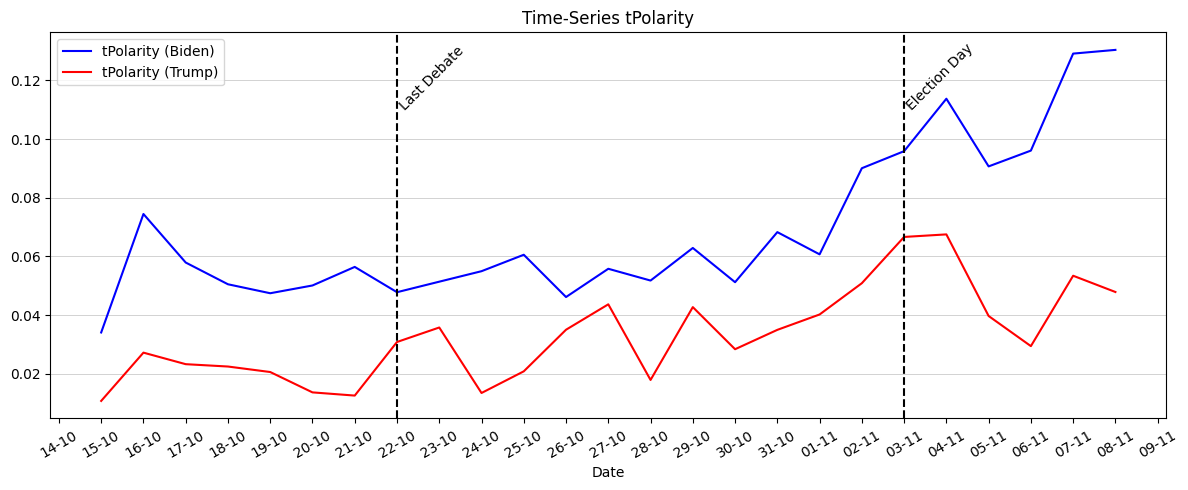

In [110]:
fig, ax= plt.subplots(1,1)
fig.set_size_inches(12,5)

biden_polarity.plot(ax=ax, color= "blue", label= "tPolarity for Biden")
trump_polarity.plot(ax=ax, color= "red", label="tPolarity (Trump)")

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%m'))  # Set the date format

election_date= pd.Timestamp("2020-11-03")
ax.axvline(election_date, color='black', linestyle='--', )
ax.text(election_date, 0.11, "Election Day", rotation= 45 )

last_debate= pd.Timestamp("2020-10-22")
ax.axvline(last_debate, color='black', linestyle='--',)
ax.text(last_debate, 0.11, 'Last Debate', rotation= 45 )

plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
ax.yaxis.grid(True, linewidth=0.4)

#ax.legend(),
ax.legend(['tPolarity (Biden)', 'tPolarity (Trump)'])

plt.title("Time-Series tPolarity")

fig_path= "E:/ReDi_School/Data_Circle/Project/0_Github/Mir/Figure/"
plt.savefig(os.path.join(fig_path, "8_timeseries_polarity.png"))

fig.tight_layout()
plt.show()

Findings: Just before the election polarity started to increase very steep. After the last debate, polarity for Biden was very steady, where as for Trump it was more anomalous. Average tPolarity for Biden was always higher than Trump.